In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, LearningCurveDisplay
from sklearn.metrics import classification_report
from sklearn import tree


pd.options.display.float_format = "{:.2f}".format

In [2]:
path = 'marketing_campaign.xlsx'

# df = pd.read_csv('sampled_data.csv')
# labels = pd.read_csv('labels.csv')


df = pd.read_excel(path)

df.drop('ID', axis=1, inplace=True)

## Sampling


In [3]:
# Variable 'Age' in replacement of the variable Year_birth

df['Age'] = 2023 - df['Year_Birth']

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).corr()['Response']

Year_Birth             0.02
Income                 0.13
Kidhome               -0.08
Teenhome              -0.15
Recency               -0.20
MntWines               0.25
MntFruits              0.13
MntMeatProducts        0.24
MntFishProducts        0.11
MntSweetProducts       0.12
MntGoldProds           0.14
NumDealsPurchases      0.00
NumWebPurchases        0.15
NumCatalogPurchases    0.22
NumStorePurchases      0.04
NumWebVisitsMonth     -0.00
AcceptedCmp3           0.25
AcceptedCmp4           0.18
AcceptedCmp5           0.33
AcceptedCmp1           0.29
AcceptedCmp2           0.17
Complain              -0.00
Z_CostContact           NaN
Z_Revenue               NaN
Response               1.00
Age                   -0.02
Name: Response, dtype: float64

As we can see "Year_Birth" doesnt have much correlation to target label, it means they are independant

So we can use it to sample our data


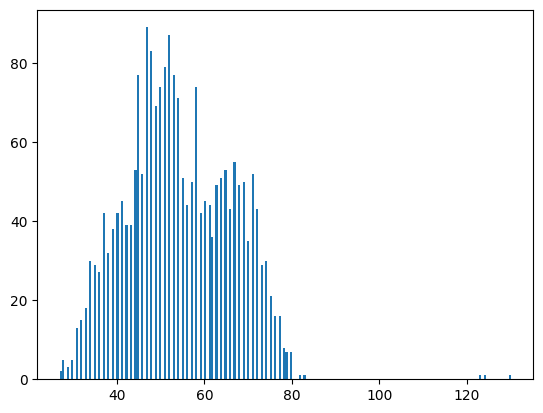

In [5]:
plt.hist(df['Age'].values, bins=200)
plt.show()

In [6]:
df['Age'].describe()

count   2240.00
mean      54.19
std       11.98
min       27.00
25%       46.00
50%       53.00
75%       64.00
max      130.00
Name: Age, dtype: float64

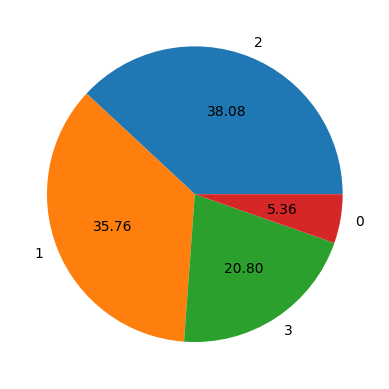

In [7]:
df['Age_group'] = df['Age'].apply(
    lambda x: 0 if 20 <= x <= 35 else 1 if 35 < x <= 50 else 2 if 50 < x <= 65 else 3)
plt.pie(df['Age_group'].value_counts(), labels=[2, 1, 3, 0], autopct="%0.2f")
plt.show()

Percentage of Age_group of Original Data


In [8]:
pd.DataFrame(df['Age_group'].value_counts(normalize=True))

,proportion
Age_group,
2,0.38
1,0.36
3,0.21
0,0.05


In [9]:
stratified_sample = df.groupby('Age_group').apply(lambda x: x.sample(frac=0.1))
stratified_sample = stratified_sample.droplevel(0)
stratified_sample

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group
921,1993,Graduation,Single,72354.00,0,0,2013-04-17,67,315,26,...,0,0,0,0,0,3,11,0,30,0
507,1989,Graduation,Single,81217.00,0,0,2013-07-19,77,493,70,...,0,0,0,0,0,3,11,0,34,0
28,1989,Graduation,Married,38360.00,1,0,2013-05-31,26,36,2,...,0,0,0,0,0,3,11,0,34,0
1890,1988,PhD,Married,67546.00,0,0,2012-08-31,90,864,134,...,0,0,0,0,0,3,11,0,35,0
893,1991,Basic,Single,26868.00,1,0,2014-04-30,52,0,0,...,0,0,0,0,0,3,11,0,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1956,PhD,Together,77376.00,1,1,2014-05-10,72,492,19,...,0,0,0,0,0,3,11,0,67,3
1922,1956,Graduation,Single,91249.00,0,0,2012-10-20,84,1324,27,...,1,1,1,1,0,3,11,1,67,3
2166,1954,Graduation,Divorced,72071.00,0,1,2013-02-14,4,531,69,...,0,0,0,0,0,3,11,0,69,3
932,1951,PhD,Single,64950.00,0,1,2012-08-12,29,819,0,...,1,0,0,0,0,3,11,0,72,3


Sampled Data percentage


In [10]:
pd.DataFrame(stratified_sample['Age_group'].value_counts(normalize=True))

,proportion
Age_group,
2,0.38
1,0.36
3,0.21
0,0.05


In [11]:
df = stratified_sample.reset_index(drop=True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group
0,1993,Graduation,Single,72354.00,0,0,2013-04-17,67,315,26,...,0,0,0,0,0,3,11,0,30,0
1,1989,Graduation,Single,81217.00,0,0,2013-07-19,77,493,70,...,0,0,0,0,0,3,11,0,34,0
2,1989,Graduation,Married,38360.00,1,0,2013-05-31,26,36,2,...,0,0,0,0,0,3,11,0,34,0
3,1988,PhD,Married,67546.00,0,0,2012-08-31,90,864,134,...,0,0,0,0,0,3,11,0,35,0
4,1991,Basic,Single,26868.00,1,0,2014-04-30,52,0,0,...,0,0,0,0,0,3,11,0,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1956,PhD,Together,77376.00,1,1,2014-05-10,72,492,19,...,0,0,0,0,0,3,11,0,67,3
220,1956,Graduation,Single,91249.00,0,0,2012-10-20,84,1324,27,...,1,1,1,1,0,3,11,1,67,3
221,1954,Graduation,Divorced,72071.00,0,1,2013-02-14,4,531,69,...,0,0,0,0,0,3,11,0,69,3
222,1951,PhD,Single,64950.00,0,1,2012-08-12,29,819,0,...,1,0,0,0,0,3,11,0,72,3


## Feature engineering


In [12]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Together', 'Divorced', 'Widow'], dtype=object)

In [13]:
# Variable 'Marital_Situation' to group the different marital status in only 2 categories :
# couple=0 vs Alone=1

df['isAlone'] = df['Marital_Status'].replace({'Divorced': 1,
                                              'Single': 1,
                                              'Married': 0,
                                              'Together': 0,
                                              'Absurd': 1,
                                              'Widow': 1,
                                              'YOLO': 1,
                                              'Alone': 1})

In [14]:
# Variable 'Spending' as the sum of the amount spent on the 6 product categories

df['Spending'] = df['MntWines'] + \
    df['MntFruits'] + \
    df['MntMeatProducts'] + \
    df['MntFishProducts'] + \
    df['MntSweetProducts'] + \
    df['MntGoldProds']

In [15]:
# Variable 'children' as an integer variable that shows the count of children.

df['children'] = df['Kidhome'] + df['Teenhome']

In [16]:
# Variable 'Educationnal_years' as the total number of years of education the individual achieved
# according to its diploma

df['Educational_years'] = df['Education'].replace({'Basic': 5,
                                                   '2n Cycle': 8,
                                                   'Graduation': 12,
                                                   'Master': 18,
                                                   'PhD': 21})

In [17]:
labels = pd.DataFrame(df['Response'])
df = df[['Age', 'Income', 'Spending', 'isAlone', 'children', 'Educational_years']]

In [18]:
df.head()

,Age,Income,Spending,isAlone,children,Educational_years
0,30,72354.00,1228,1,0,12
1,34,81217.00,1157,1,0,12
2,34,38360.00,131,0,1,12
3,35,67546.00,2126,0,0,21
4,32,26868.00,14,1,1,5


In [19]:
labels.head()

,Response
0,0
1,0
2,0
3,0
4,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                224 non-null    int64  
 1   Income             222 non-null    float64
 2   Spending           224 non-null    int64  
 3   isAlone            224 non-null    int64  
 4   children           224 non-null    int64  
 5   Educational_years  224 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 10.6 KB


So there is missing values for "Income" column


In [21]:
df.describe()

,Age,Income,Spending,isAlone,children,Educational_years
count,224.00,222.00,224.00,224.00,224.00,224.00
mean,54.44,54657.79,611.52,0.35,0.92,14.50
std,12.20,22694.07,568.36,0.48,0.74,4.29
min,30.00,5648.00,11.00,0.00,0.00,5.00
25%,46.00,36747.25,79.75,0.00,0.00,12.00
50%,53.00,54646.50,422.50,0.00,1.00,12.00
75%,64.00,70787.25,1033.25,1.00,1.00,18.00
max,80.00,157733.00,2126.00,1.00,3.00,21.00


In [22]:
# df.to_csv('sampled_data.csv', index=False)
# labels.to_csv('labels.csv', index=False)

some guesses about data:

> Average spending in the last 2 years is 605 dollars while median spending is 396 dollars


## Handling outliers


> IQR= Q_3-Q_1
> where :

- $Q_1$ is the first quartile
- $Q3$ is the third quartile

> - Any value greater (lower) 1.5 times the IQR above (below) the third quartile (the first quartile) is defined as a **mild outlier**
> - Any value greater (lower) 3 times the IQR above (below) the third quartile (the first quartile) is defined as an **extreme outlier**

![outliers](outliers.jpg)


In [23]:
quartile1_Age = df['Age'].quantile(.25)
quartile2_Age = df['Age'].quantile(.75)
Age_bound = 1.5 * (quartile2_Age - quartile1_Age)
labels = labels.drop(df[df['Age'] < quartile1_Age-Age_bound].index)
labels = labels.drop(df[df['Age'] > quartile2_Age+Age_bound].index)
df = df.drop(df[df['Age'] < quartile1_Age-Age_bound].index)
df = df.drop(df[df['Age'] > quartile2_Age+Age_bound].index)

quartile1_Income = df['Income'].quantile(.25)
quartile2_Income = df['Income'].quantile(.75)
Income_bound = 1.5 * (quartile2_Income - quartile1_Income)
labels = labels.drop(df[df['Income'] < quartile1_Income-Income_bound].index)
labels = labels.drop(df[df['Income'] > quartile2_Income+Income_bound].index)
df = df.drop(df[df['Income'] < quartile1_Income-Income_bound].index)
df = df.drop(df[df['Income'] > quartile2_Income+Income_bound].index)

quartile1_Spending = df['Spending'].quantile(.25)
quartile2_Spending = df['Spending'].quantile(.75)
Spending_bound = 1.5 * (quartile2_Spending - quartile1_Spending)
labels = labels.drop(
    df[df['Spending'] < quartile1_Spending-Spending_bound].index)
labels = labels.drop(
    df[df['Spending'] > quartile2_Spending+Spending_bound].index)
df = df.drop(df[df['Spending'] < quartile1_Spending-Spending_bound].index)
df = df.drop(df[df['Spending'] > quartile2_Spending+Spending_bound].index)

## Handling Missing Values


'''
making a knn model to predict lost incomes based on other data
'''


In [24]:
df

,Age,Income,Spending,isAlone,children,Educational_years
0,30,72354.00,1228,1,0,12
1,34,81217.00,1157,1,0,12
2,34,38360.00,131,0,1,12
3,35,67546.00,2126,0,0,21
4,32,26868.00,14,1,1,5
...,...,...,...,...,...,...
219,67,77376.00,661,0,2,21
220,67,91249.00,1676,1,0,12
221,69,72071.00,1338,1,1,12
222,72,64950.00,966,1,1,21


In [25]:
knn = KNeighborsRegressor(n_neighbors=5)
x = pd.get_dummies(df).dropna().drop(['Income'], axis=1)

y = df.dropna()['Income']

knn.fit(x, y)

KNeighborsRegressor()

In [26]:
lost_rows = df.drop(df.dropna().index).drop('Income', axis=1)
lost_rows = pd.get_dummies(lost_rows)
predictions = knn.predict(lost_rows)

In [27]:
null_indexes = df['Income'].isna()
df.loc[null_indexes, 'Income'] = predictions

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 0 to 223
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                222 non-null    int64  
 1   Income             222 non-null    float64
 2   Spending           222 non-null    int64  
 3   isAlone            222 non-null    int64  
 4   children           222 non-null    int64  
 5   Educational_years  222 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 20.2 KB


## Data visualization


{'whiskers': [<matplotlib.lines.Line2D at 0x1db08cdbd00>,
 'caps': [<matplotlib.lines.Line2D at 0x1db08d18280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db08cdba60>],
 'medians': [<matplotlib.lines.Line2D at 0x1db08d187c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db08d18a60>],
 'means': []}

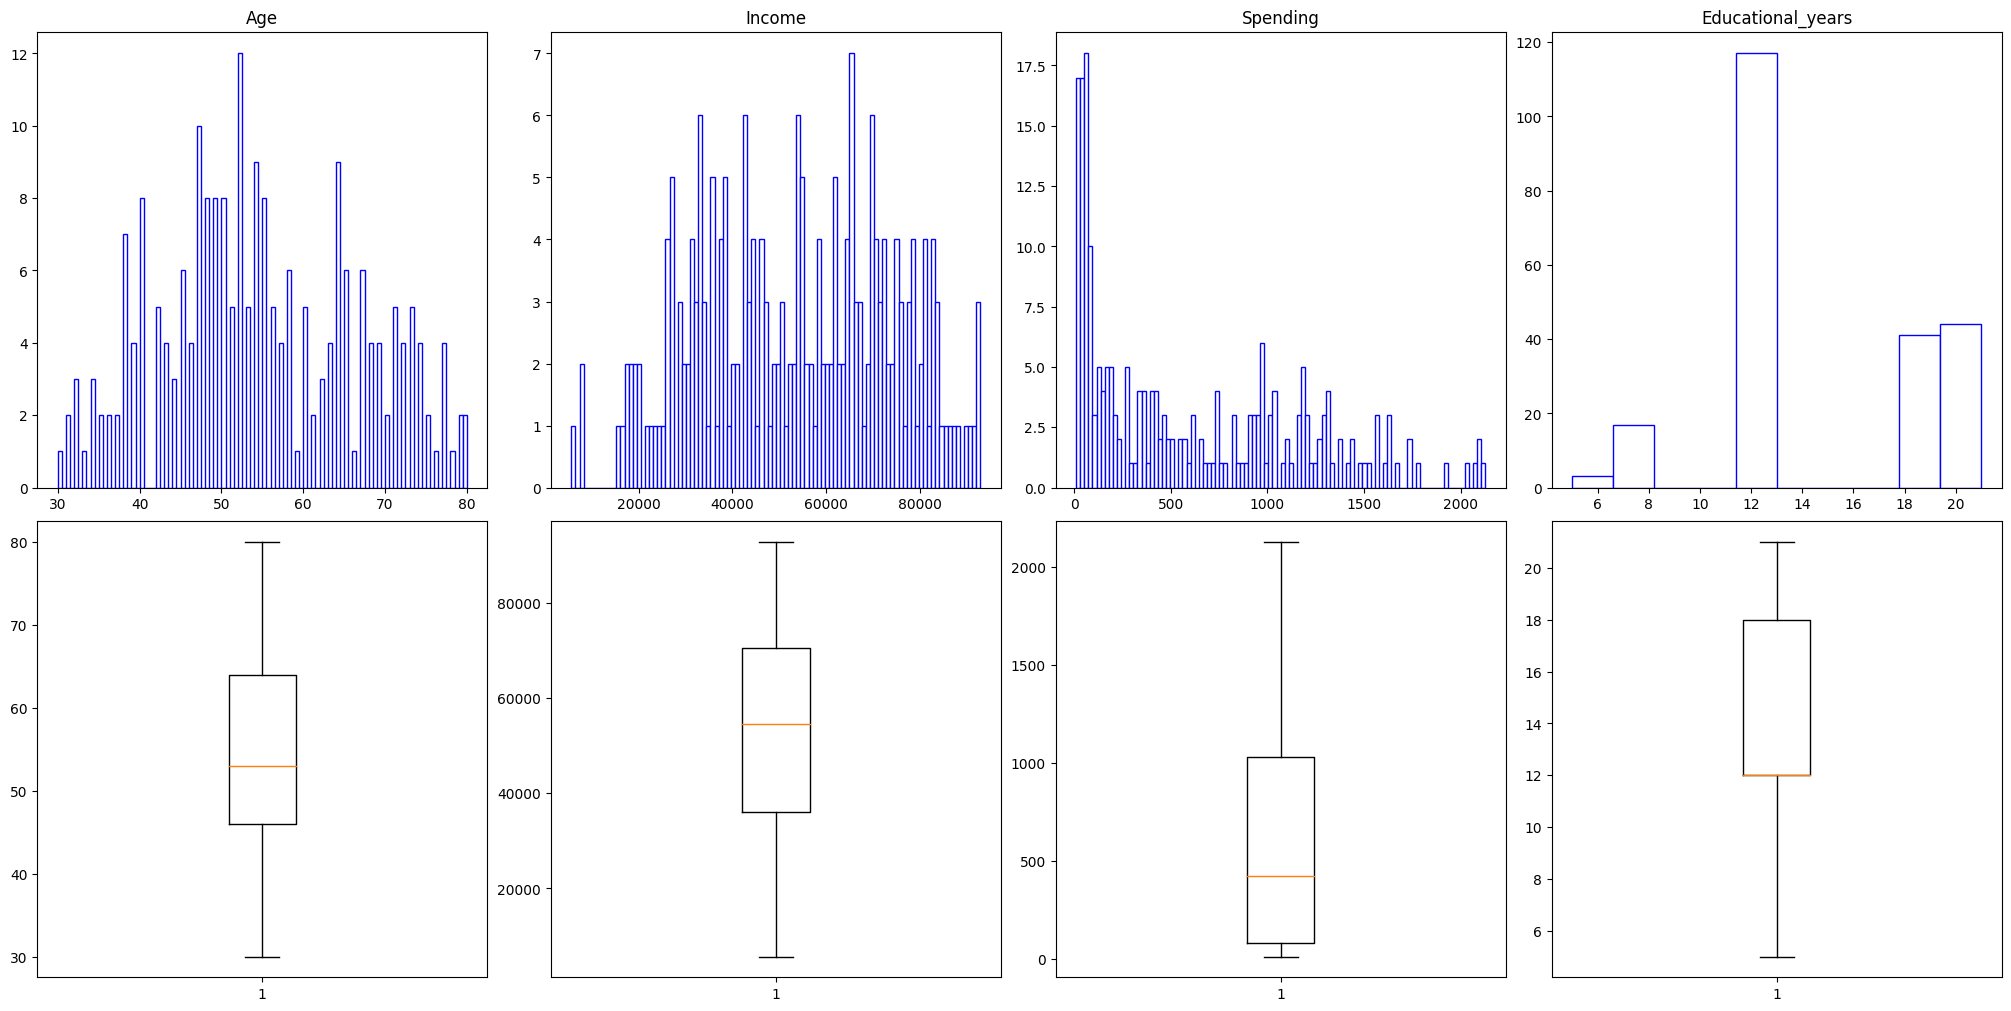

In [29]:
fig, axis = plt.subplots(2, 4, constrained_layout=True, figsize=(20, 10))

axis[0, 0].hist(df['Age'], bins=100, edgecolor="blue", color="white")
axis[0, 0].set_title('Age')

axis[0, 1].hist(df['Income'], bins=100, edgecolor="blue", color="white")
axis[0, 1].set_title('Income')

axis[0, 2].hist(df['Spending'], bins=100, edgecolor="blue", color="white")
axis[0, 2].set_title('Spending')

axis[0, 3].hist(df['Educational_years'], bins=10,
                edgecolor="blue", color="white")
axis[0, 3].set_title('Educational_years')

# ----------------------------------------------------------------

axis[1, 0].boxplot(df['Age'])

axis[1, 1].boxplot(df['Income'][:400])

axis[1, 2].boxplot(df['Spending'])

axis[1, 3].boxplot(df['Educational_years'])

## Train final predictor model


In [55]:
x_train, x_test, y_train, y_test = train_test_split(
    df, labels['Response'], test_size=0.2)

In [56]:
y_train.value_counts()

Response
0    150
1     27
Name: count, dtype: int64

In [113]:
model = RandomForestClassifier(n_estimators=50, max_depth=5)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

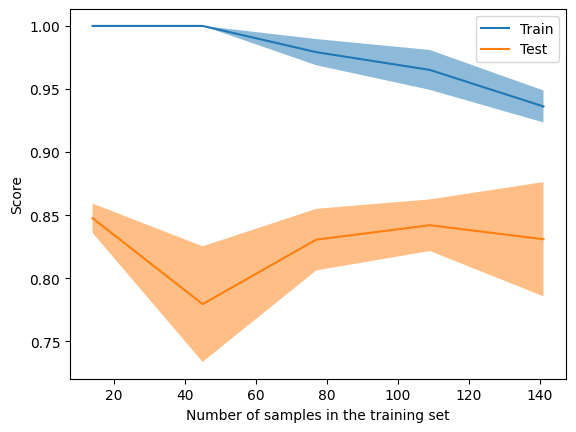

In [114]:
LearningCurveDisplay.from_estimator(model, X=x_train, y=y_train)

In [115]:
predictions = model.predict(x_test)

In [116]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.33      1.00      0.50         1

    accuracy                           0.96        45
   macro avg       0.67      0.98      0.74        45
weighted avg       0.99      0.96      0.97        45



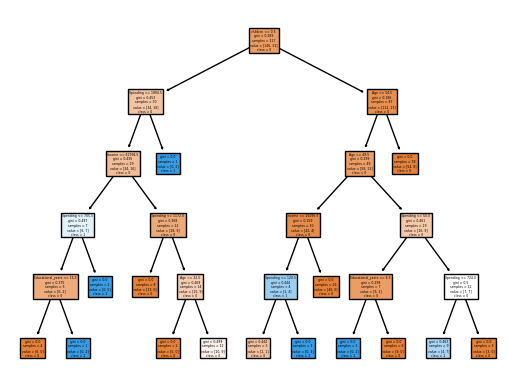

In [117]:
tree.plot_tree(model.estimators_[0],
               feature_names=list(x_train.columns.values),
               class_names=['0', '1'],
               filled=True)
plt.savefig('RF_Classifier.png', dpi=500)
plt.show()